# EDA Project Roadmap
## 1. Introduction of the dataset and aim of the EDA
    1. Dataset Introduction
    2. Aim of the EDA
## 2. Libraries setup and reading the data
    1. pandas for data processing
    2. numpy for mathematical operations
    3. matplotlib.plotly, seaborn & plotly.express for data vizualisations (instead of tableau)
## 3. get an overview and deep review of the data.
    1. using info & describe functions
    2. using head & tail functions to view the data
## 4. Handling missing values and Data Structuring
    1. Managing columns (Create, drop and rename)
    2. changing the datatypes of the columns
    3. using isull.sum # Count missing values per column
    4. using heatmap sns.heatmap(data.isnull(), cbar=False)  # Visualize missing data
    5. fill or drop missing values according to the dataset and logic.
    6. check for outliets using sns.boxplot(x=data['column_name']) for numerical columns.
## 5. Analysis and vizualisation of the data
    1. using seaborn and matplotlib to provide detailed vizulaisations
## 6. provide insights from vizualisations
    1. prepare a summery report including the insights.

# 1. **Introduction of the dataset and aim of the EDA**

<img src='https://logos-world.net/wp-content/uploads/2020/11/Zomato-Logo.png'></img>

## 1. **Dataset Introduction**

The dataset being analyzed is from the <a href ='https://www.zomato.com/'>**Zomato Website**</a>, which contains information about restaurants, their locations, ratings, cuisines, and more. It includes **20,000+ records and 17 features**. Key variables in the dataset include **'Restaurant Name'**, **'Location'**, **'Cuisine'**, **'Average Cost for Two'**, and **'Rating'**.

### Key Features:
- **Restaurant Name**: Name of the restaurant (categorical).
- **Location**: City or region where the restaurant is located (categorical).
- **Cuisine**: Type of cuisine served (categorical).
- **Average Cost for Two**: Average cost of a meal for two people (numeric).
- **Rating**: Restaurant rating on Zomato (numeric).

## 2. **Aim of the EDA**

The primary aim of this **Exploratory Data Analysis (EDA)** is to explore the dataset and uncover patterns. Specifically, we will:
1. Analyze the distribution of key variables (e.g., Ratings, Average Cost).
2. Identify missing values and handle them.
3. Investigate relationships between variables, such as the correlation between **Rating** and **Average Cost**.
4. Detect any outliers or unusual patterns in restaurant ratings or costs.

The insights from this EDA will help guide future modeling, such as predicting restaurant ratings or identifying factors influencing restaurant success.ing restaurant success.

# 2. **Libraries setup and reading the data**

In [1]:
#Missingno helps you identify, visualize, and understand missing data patterns in your dataset, enabling you to make informed decisions about how to handle missing values during preprocessing.
!pip install missingno

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Base libraries
import time
# #Function: Provides time-related functions, like time.sleep() for pausing execution, time.time() for getting the current time in seconds, and various ways to measure time intervals.
# When to Keep: Useful if you're timing certain processes (e.g., performance analysis).
# Can Disregard?: If you're not measuring execution time or working with time-related functionality in your analysis, you can safely omit it.

#import datetime
# Function: Provides classes for manipulating dates and times, such as datetime.datetime and datetime.timedelta. You can easily perform operations like adding days to a date or comparing two timestamps.
# When to Keep: If your data involves timestamps or you need to perform date/time manipulations, keep this.
# Can Disregard?: If you don't need to work with dates or times explicitly, you can disregard it.

#import os
# Function: Allows interaction with the operating system, such as navigating file directories, checking for files, or working with environment variables.
# When to Keep: If your workflow requires file management (reading/writing files, checking file paths), you should keep this.
# Can Disregard?: If you don't need to interact with the filesystem, you can discard this.

# Scientific libraries
import numpy as np
# Function: Core scientific computing library in Python. Provides support for large multi-dimensional arrays and matrices, along with a variety of mathematical functions to operate on them.
# When to Keep: Essential for numerical operations, array manipulation, statistical calculations, etc.
# Can Disregard?: It’s unlikely you’ll discard this unless you're working with data in only Pandas DataFrames and don’t need arrays or advanced math operations.

import pandas as pd
# Function: Provides data structures like DataFrame and Series for data manipulation, especially useful for handling structured data (e.g., CSVs, databases).
# When to Keep: Critical for most EDA tasks. Essential for handling tabular data, cleaning, and analyzing it.
# Can Disregard?: Rarely will you discard this, unless you’re not working with structured data (e.g., JSON, XML) and you use only basic Python data structures.

#from empiricaldist import Cdf, Pmf
# Function: Provides tools for working with empirical distributions. Cdf is the cumulative distribution function, and Pmf is the probability mass function, both useful for visualizing and analyzing data distributions.
# When to Keep: Keep if you're working with empirical distributions and need advanced plotting/analysis of how data is distributed (e.g., histogram analysis, KDEs).
# Can Disregard?: If you don’t need to perform statistical distribution analysis or advanced visualizations, you can discard this.

# Visual libraries
import matplotlib.pyplot as plt
# Function: The core library for creating static, animated, and interactive visualizations in Python.
# When to Keep: Essential for basic plotting (line plots, bar plots, histograms).
# Can Disregard?: Unlikely to discard if you need any form of visualizations, but if you prefer using Seaborn or other libraries exclusively, you might omit this (though Seaborn internally uses Matplotlib).

#from matplotlib import rcParams
# Function: Allows you to customize the default settings of Matplotlib plots, such as figure size, font size, axis labels, etc.
# When to Keep: Useful for setting global style preferences and improving plot readability. Essential for customizing the appearance of your visualizations.
# Can Disregard?: If you're fine with default Matplotlib settings and don’t need advanced plot customizations, you can skip this.

import seaborn as sns
# Function: A high-level interface for creating attractive statistical plots built on top of Matplotlib. It’s especially great for visualizing relationships between variables, distributions, and categorical data.
# When to Keep: Highly recommended for creating aesthetic and informative plots. It's much easier to use than raw Matplotlib for many common plot types.
# Can Disregard?: Only if you prefer using other visualization libraries (e.g., Plotly, or Matplotlib only), but Seaborn is generally a good choice for EDA.

import missingno as msno  # Visualize missing values
# Function: A specialized library for visualizing missing data. It helps you quickly assess patterns and relationships of missingness in your dataset.
# When to Keep: Extremely useful during EDA if your data has missing values. It simplifies the process of understanding and visualizing missing data.
# Can Disregard?: If you don’t have missing data or plan to handle it using other methods, you might not need this.

# Helper libraries
#from tqdm.notebook import tqdm, trange
# Function: Provides progress bars for loops in Jupyter notebooks, making it easier to track long-running computations.
# When to Keep: Useful if you're performing long-running tasks like data processing or training machine learning models.
# Can Disregard?: If your workflow doesn’t involve long-running tasks or you don’t need progress bars, you can discard this.

#from colorama import Fore, Back, Style
# Function: Provides cross-platform support for colored terminal text output (useful for adding color to print statements in the terminal).
# When to Keep: Useful if you want to style terminal outputs for better readability (e.g., for debugging or logging).
# Can Disregard?: If you don't need colored text output in the terminal, you can omit this.

import warnings
warnings.filterwarnings('ignore')
# Function: Used to manage warnings. warnings.filterwarnings('ignore') suppresses warnings, often used in notebooks or scripts to keep output clean.
# When to Keep: Useful if you want to suppress non-critical warnings during your analysis (for example, ignoring warnings about deprecated functions).
# Can Disregard?: If you prefer to see warnings or don't mind them, you can omit this.

# Visual setup
#import matplotlib.ticker as ticker
# Function: Provides tools for customizing the tick marks and labels of Matplotlib plots (e.g., controlling the appearance of axis labels and tick intervals).
# When to Keep: Useful for advanced control over tick marks (e.g., making ticks more readable or changing their frequency).
# Can Disregard?: If you're okay with the default tick settings in your plots, you can omit this.

#plt.style.use('ggplot')
# Function: Applies the ggplot2 style (a popular R plotting style) to Matplotlib plots, giving them a more polished, aesthetically-pleasing appearance.
# When to Keep: Useful for improving the visual style of your plots without needing to manually adjust settings.
# Can Disregard?: If you don’t need this specific style or are happy with the default Matplotlib style, you can skip it.

# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
# rcParams['figure.figsize'] = [12, 9]
# rcParams['font.size'] = 16
# plt.rc('xtick', labelsize=12)
# plt.rc('ytick', labelsize=12)
# Function: These commands customize global settings for Matplotlib to control figure size, font size, and axes spines.
# When to Keep: Essential if you want specific control over the appearance of all plots.
# Can Disregard?: If you don't need specific customizations, you can omit them.

# custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
# sns.set_palette(custom_colors)
# %config InlineBackend.figure_format = 'retina'
# %config Completer.use_jedi = False
# Function: Sets the color palette for Seaborn plots.
# When to Keep: If you want to set a custom color palette to maintain consistency in your plots.
# Can Disregard?: If you're fine with the default Seaborn palette, you can omit this.

# Pandas options
#pd.set_option('max_colwidth', 40)
# Function: Sets the maximum column width in Pandas DataFrame display (helpful for wide text fields).
# When to Keep: Useful when displaying large text columns (e.g., in Jupyter Notebooks).
# Can Disregard?: If you're not displaying wide columns or are fine with the default settings, you can omit this.

pd.options.display.max_columns = None  # Possible to limit
# Function: Allows displaying all columns in a Pandas DataFrame.
# When to Keep: Useful when you want to see all columns, especially in large DataFrames.
# Can Disregard?: If you're okay with limiting the number of columns displayed, you can omit this.

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'
# Function: Controls the interactive shell behavior, such as enabling the display of all output from the last expression in a cell (for Jupyter).
# When to Keep: Useful in Jupyter Notebooks if you want all expressions in a cell to be printed (not just the last one).
# Can Disregard?: If you're not using Jupyter or don’t need this behavior, you can omit it.

# Seed value for numpy.random
np.random.seed(42)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-information-dataset/students.csv


In [3]:
#Reading the data
df_raw = pd.read_csv('/kaggle/input/student-information-dataset/students.csv')

# 3. **get an overview and deep review of the data.**

In [4]:
df_raw.head()

,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025


In [5]:
df_raw.info()
#no null values.
# the dtypes are correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       200 non-null    int64  
 1   Name            200 non-null    object 
 2   Age             200 non-null    int64  
 3   Email           200 non-null    object 
 4   Department      200 non-null    object 
 5   GPA             200 non-null    float64
 6   GraduationYear  200 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [6]:
df_raw[['Age', 'GPA']].describe()

,Age,GPA
count,200.000000,200.00000
mean,21.580000,3.02785
std,2.267002,0.59112
min,18.000000,2.00000
25%,20.000000,2.52500
50%,22.000000,3.08000
75%,24.000000,3.51000
max,25.000000,3.99000


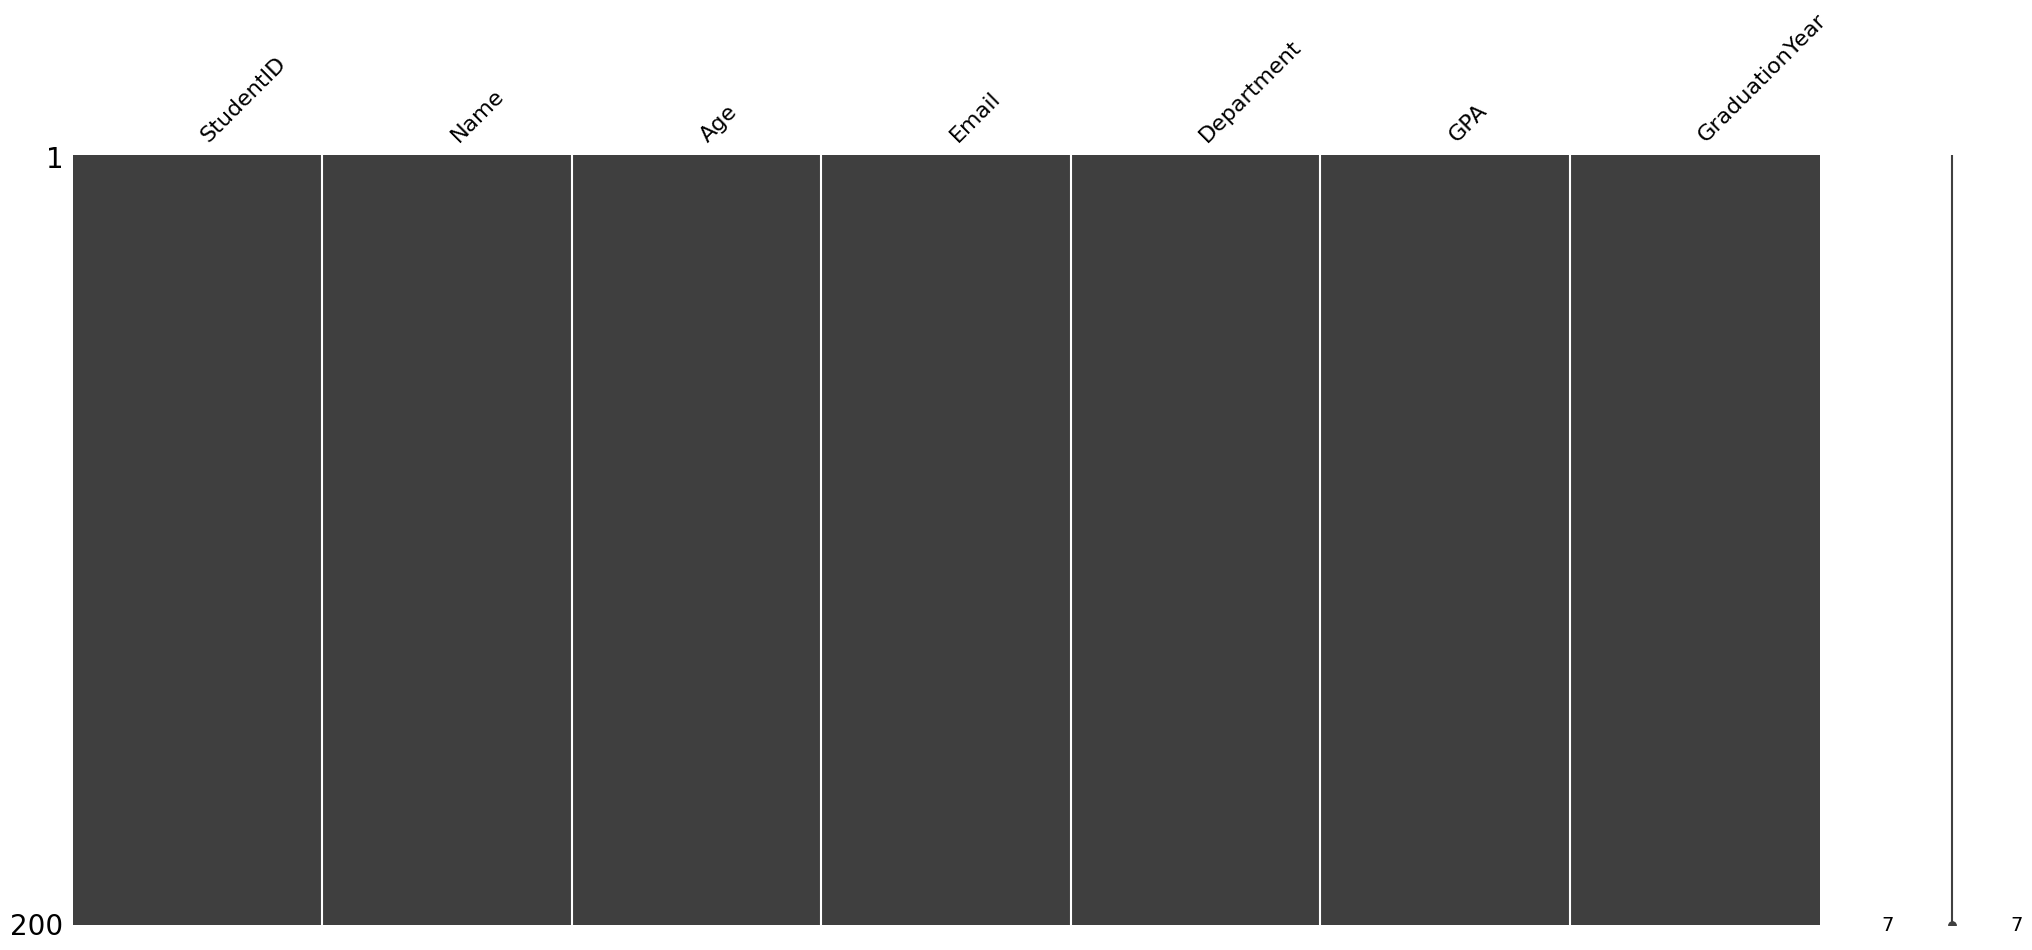

In [7]:
# visualize missing values
msno.matrix(df_raw);
# no missing values

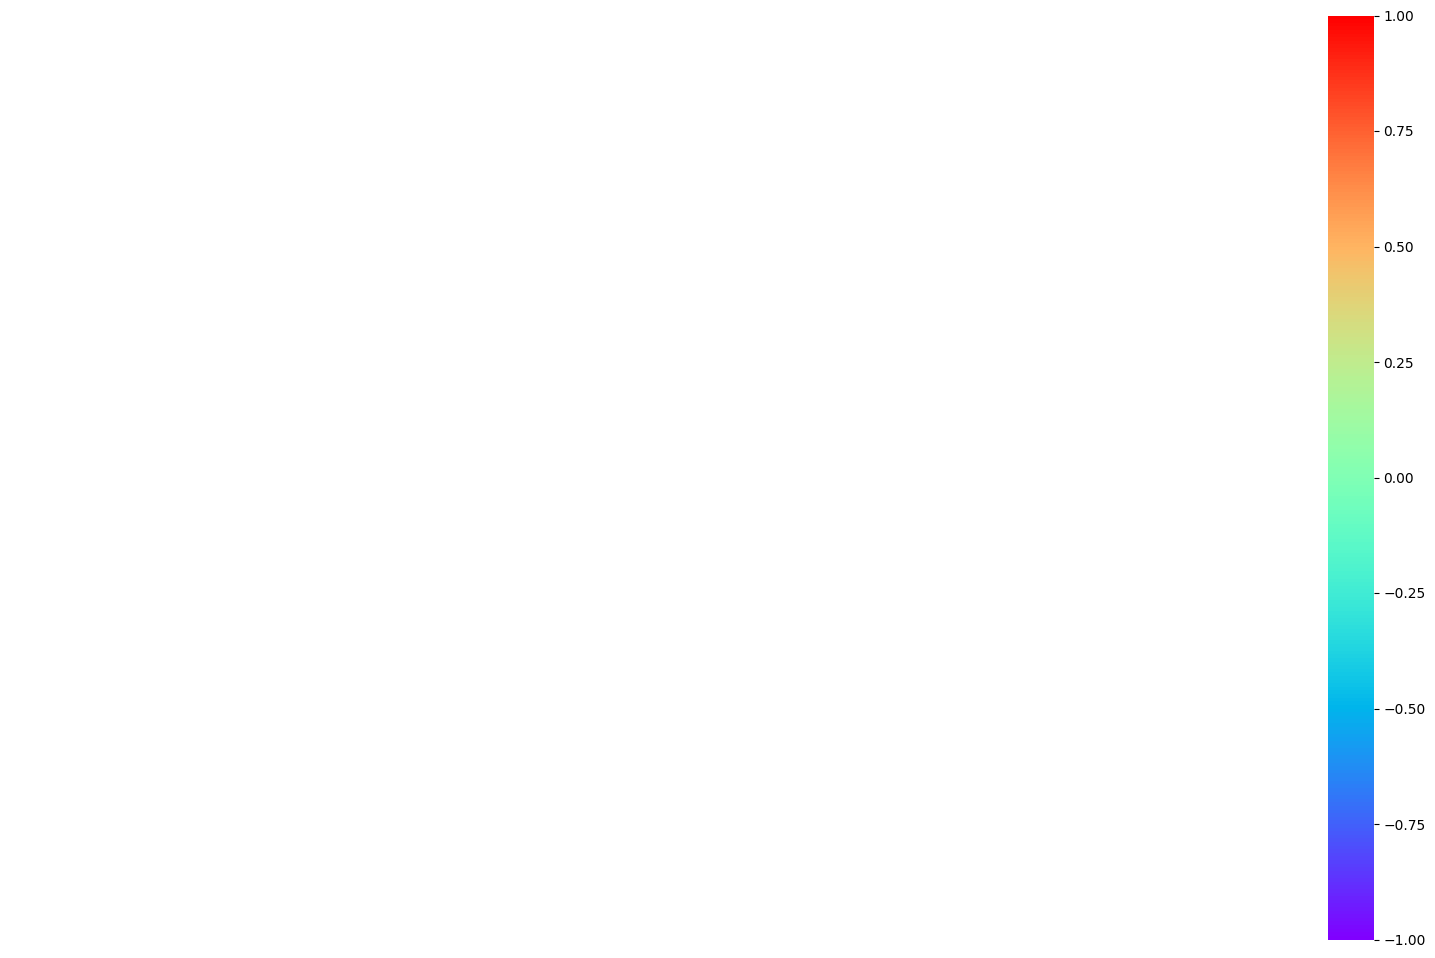

In [8]:
msno.heatmap(df_raw, cmap='rainbow');

In [9]:
df_raw.head()

,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025


### From the above, the below steps will be required to effectivley clean the data and prepare for further analysis
    1. change column names to appropriate names
    2. check for any extra white spaces and remove them.
    3. create a new dataframe for the student contact including columns (ID,Name, Age, Email).
    4. Drop contact columns from the original dataframe except (Name, Age) columns.
    5. Create new column (Graduation_age) which is the age of student when graduating.
s

## 4. Handling missing values and Data Structuring

### 4.1. Change column names to appropriate names.

In [10]:
df_raw.columns

Index(['StudentID', 'Name', 'Age', 'Email', 'Department', 'GPA',
       'GraduationYear'],
      dtype='object')

In [11]:
#make a copy of the dataframe to keeo the original
df = df_raw.copy()

In [12]:
# Create a dictionary to map old column names to new ones
new_column_names = {
    'StudentID': 'student_ID',
    'Name': 'student_name',
    'Age': 'student_age',
    'Email': 'student_email',
    'Department': 'major',
    'rate': 'restaurant_rating',
    'votes': 'votes_count',
    'phone': 'contact_number',
    'location': 'restaurant_location',
    'rest_type': 'restaurant_type',
    'dish_liked': 'popular_dishes',
    'cuisines': 'cuisine_types',
    'approx_cost(for two people)': 'approx_cost_two',
    'reviews_list': 'customer_reviews',
    'menu_item': 'menu_items',
    'listed_in(type)': 'listing_category',
    'listed_in(city)': 'city'
}